## **Microsft Movie Studio Research**




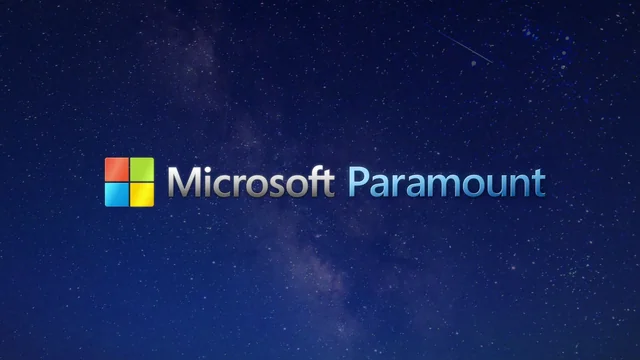

# **Overview**

This project aims to help Microsoft in creating their new movie studio by trying to find the movies currently charting in the box office,this will in turn help them in deciding what type of movies to create and their target audience.Using this data Microsft's new movie studio will also be able to lead in the film industry.

# **Business Problem**

Microsoft is planning to make a debut in the movie industry,but they dont have any proffesional experience in this field.This research will give the company a clear undestanding of the movie industry,the trends in the market which ultimately help in decision making.

# **Data Understanding**

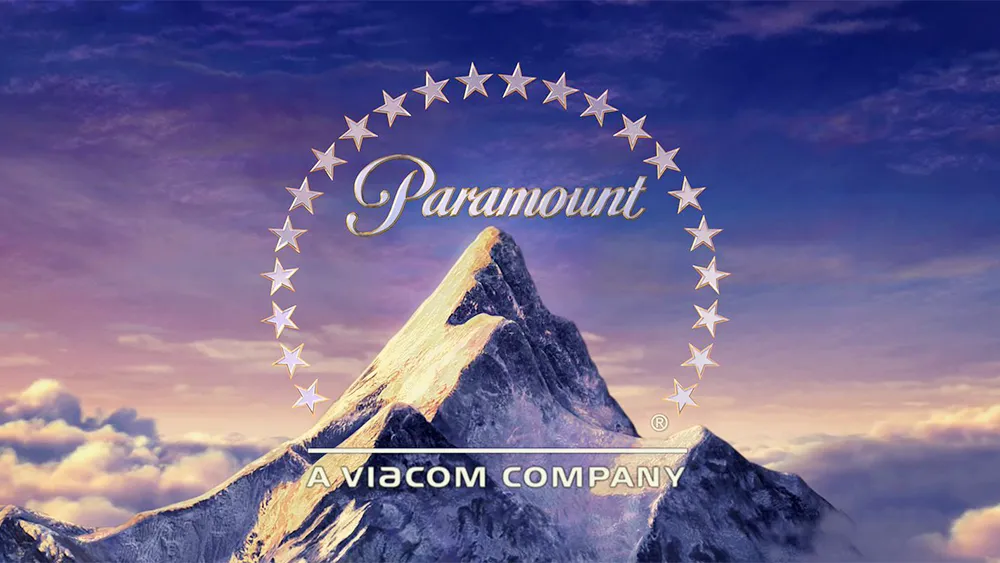

The dataset contains box office perfomance data for movies.The dataset provides domestic and international earnings for each of the films,year of production and the movie studios that produced the films.

In [ ]:
# Importing Neccesary Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bom.movie_gross.csv')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Inspecting Our Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3387 non-null   object 
 1   Studio          3382 non-null   object 
 2   Domestic_gross  3359 non-null   float64
 3   Foreign_gross   3387 non-null   float64
 4   Year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


From our dataset we can deduce that we have 4 columns and 3387 rows.Some columns have missing data with _foreign gross_ having the most missing items.we can also see that _foreign gross_ is an object we can covert that to a float

In [ ]:
# Checking our columns
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
# identifying the missing values
df.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


# **Data Cleaning**

In [ ]:
# We can capitalize our columns

df.columns = df.columns.str.capitalize()
df.columns


Index(['Title', 'Studio', 'Domestic_gross', 'Foreign_gross', 'Year'], dtype='object')

In [ ]:
# here we will change _foreign gross_ from float to numeric

df['foreign_gross'] = df['foreign_gross'].str.replace(',', '', regex=False)
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

In [ ]:
# here we confirm that data column type was changed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3387 non-null   object 
 1   Studio          3382 non-null   object 
 2   Domestic_gross  3359 non-null   float64
 3   Foreign_gross   2037 non-null   float64
 4   Year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


we have converted our column to a float due to ease of perfoming mathematical operations and for visualiastions.

In [ ]:
# checking the rows with missing values

df[df.isnull().any(axis=1)]

,Title,Studio,Domestic_gross,Foreign_gross,Year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
222,Flipped,WB,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


- We shall impute missing values in foreign_gross using the average for each studio.


In [ ]:
# replacing the mising values in foreign gross with the average studio earnings.

df['Foreign_gross'] = df.groupby('Studio')['Foreign_gross'].transform(
    lambda x: x.fillna(x.mean())
)



In [ ]:
# Confirming that we filled in the missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3387 non-null   object 
 1   Studio          3382 non-null   object 
 2   Domestic_gross  3359 non-null   float64
 3   Foreign_gross   3382 non-null   float64
 4   Year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


- We can see above that we have filled in our missing data,we now have a complete dataset.

Text(0.5, 1.0, 'Gross data boxplot')

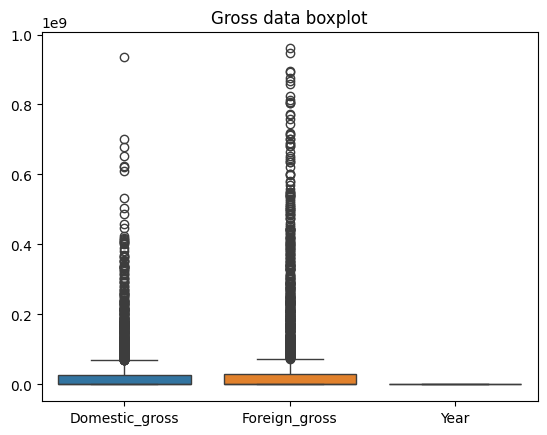

In [ ]:
# Checking for outliers in our dataset.(seaborn)

sns.boxplot(data=df)
plt.title('Gross data boxplot')

<Axes: >

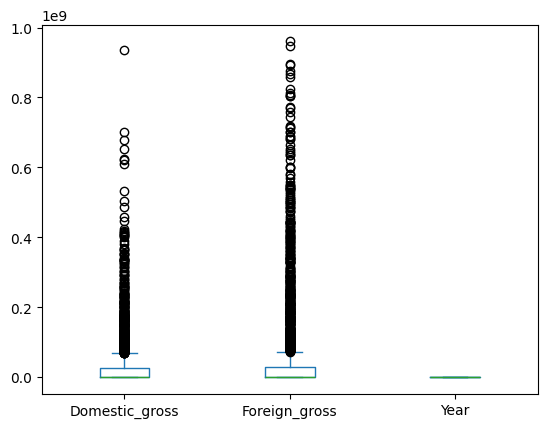

In [ ]:
# Matplotlib
df.plot(kind='box')

- The domestic and foreign gross columns have many outliers,because this is a film dataset and movie earnings are naturally skewed.
- Most movies have modest returns while others earn millions and since this represents real time data it would be best if we kept them.

# **Analysis**

In [ ]:
# Getting statistical summaries.

df.describe()

,Domestic_gross,Foreign_gross,Year
count,3.359000e+03,3.382000e+03,3387.000000
mean,2.874585e+07,4.505716e+07,2013.958075
std,6.698250e+07,1.127504e+08,2.478141
min,1.000000e+02,0.000000e+00,2010.000000
25%,1.200000e+05,0.000000e+00,2012.000000
50%,1.400000e+06,1.450000e+06,2014.000000
75%,2.790000e+07,2.917500e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


- The highest domestic gross earning is 936 million dollars and the lowest is 100 dollars.
- The highest foreign gross earning is 960 Million dollars and the lowest is 600 dollars.
- Median and mean are both higher for the foreign gross than domestic gross.This indicates foreign markets tend to earn more.
- There is a huge variation in the earmings.Most movies earn a little while others earn a lot.

# **Visualizations**

<Axes: >

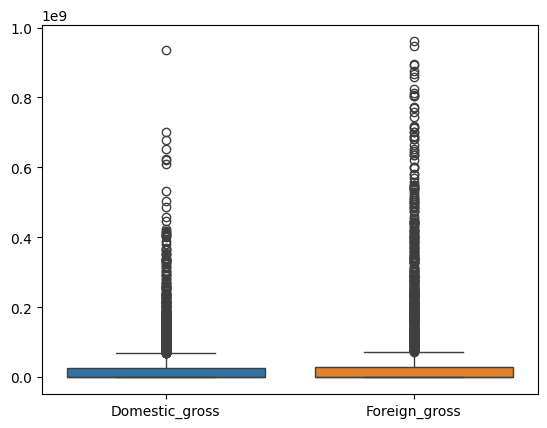

In [ ]:
sns.boxplot(data=df[['Domestic_gross', 'Foreign_gross']])



<Axes: xlabel='Domestic_gross', ylabel='Count'>

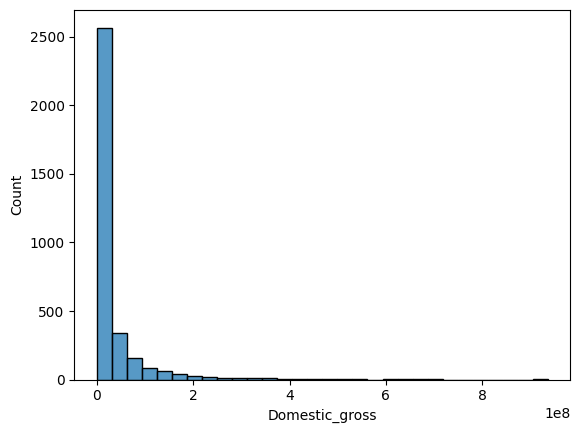

In [ ]:
# Histogram of Domestic_Gross

sns.histplot(df['Domestic_gross'], bins=30)


<Axes: xlabel='Foreign_gross', ylabel='Count'>

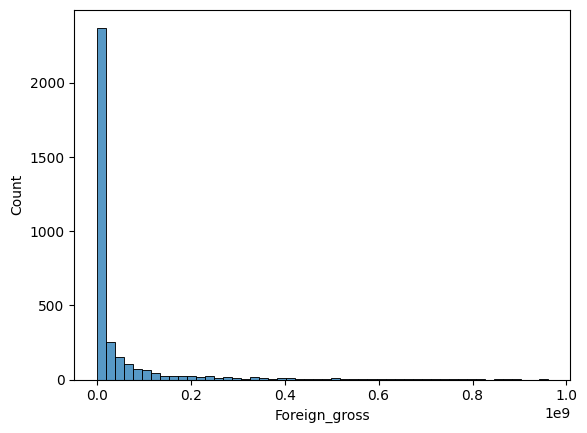

In [ ]:
# Histogram of Foreign_Gross

sns.histplot(df['Foreign_gross'], bins=50)

<Axes: xlabel='Year'>

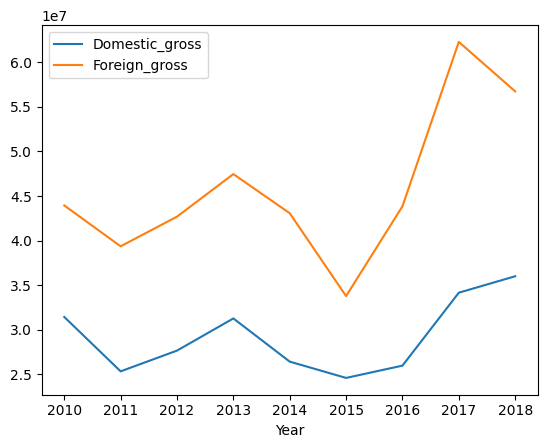

In [ ]:
# Line plot of trends over time.

yearly = df.groupby('Year')[['Domestic_gross', 'Foreign_gross']].mean()
yearly.plot()


<Axes: xlabel='Studio'>

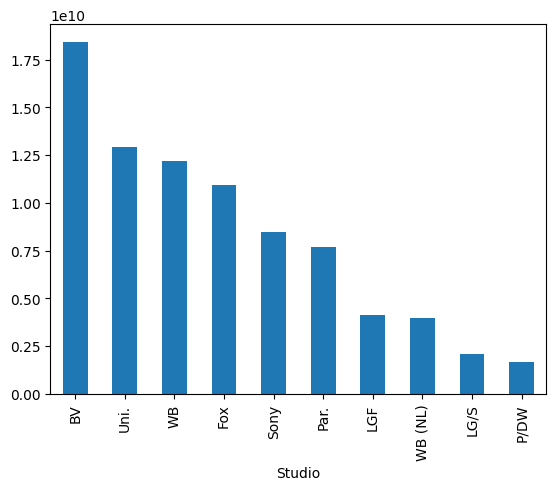

In [ ]:
# Bar plot Of Top Studios.

top_studios = df.groupby('Studio')['Domestic_gross'].sum().sort_values(ascending=False).head(10)
top_studios.plot(kind='bar')



<Axes: xlabel='Domestic_gross', ylabel='Foreign_gross'>

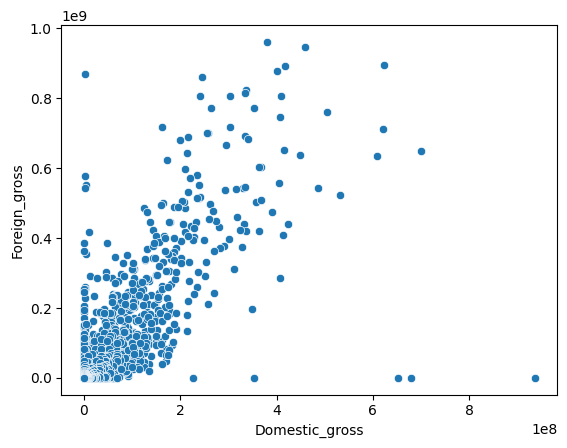

In [ ]:
# Scatter Plot

sns.scatterplot(data=df, x='Domestic_gross', y='Foreign_gross')


<Axes: >

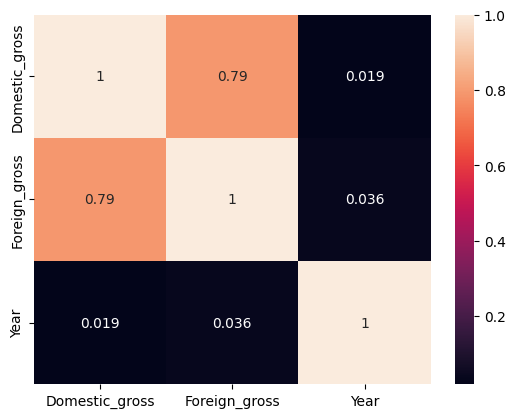

In [ ]:
# Heatmap of correlations.

sns.heatmap(df[['Domestic_gross', 'Foreign_gross', 'Year']].corr(), annot=True)


# **Conclusions & Recommendations.**

This research points to four recommendations for creation of the new microsoft movie studio:

*- Focus more on the foreign market.* From our research we can clearly see that movies have the occasion to perfom well internationaly rather than domestically,so creating movies with the foreign market in mind would also up the chances of it being a hit.

*- Films that did well domestically also did well in the foreign market* .The studio should be in tune with the domestic atmosphere when making movies as these movies will have a high chance than movies that solely targeted the foreign market.

*- Some of the studios are known for making good films with high  earnings.* It would better to liase with such companies as this would increase chances of success.

*-There is yealy highs and lows in terms of earnings.* Understanding this patterns when releasing or creating films might increase cnances of success.